# Spatial Data Analysis

This introduction note uses the data of homicide rate in Mosouri and computes global/local Moran's I for spatial autocorrelation. The data shows only weak spatial correlation of homicide rate. Then we introduce different geovisualization tools $-$ Implement geoPandas to generate geoDataFram/geovisualization and using kml. In the last part, we use another data source to demo **adjusted Moran's I**.

     A. Data Source: Homicides rate nearby St Louis, MO
     B. Global Moran's I
     C. Local Moran's I
     D. Geovisualization
        D.1 Visualize Local Moran's I on kml
        D.2 Visualize homicide rates
        D.3 Visualize local Moran's I and significant areas
     E. Adjusted Moran's I


In [322]:
import pysal
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib
#matplotlib.use("nbagg") #this allows for plotting to happen inside the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# A. Data Source: Homicides rate nearby St Louis, MO

1. [Data file operation in pysal](http://pysal.readthedocs.io/en/latest/users/tutorials/fileio.html)

2. [Example metadata](http://pysal.readthedocs.io/en/latest/users/tutorials/examples.html)

In [338]:
data = pysal.open(pysal.examples.get_path("stl_hom.txt"))
x = np.array(data.by_col['HR8893'])

In [93]:
print len(data)
print data.header
print data.dat[:5]

78
['FIPSNO', 'HR8488', 'HR8893', 'HC8488']
[['17107', '1.290722', '1.624458', '2'], ['17001', '2.655839', '2.255492', '9'], ['17129', '1.742433', '1.46789', '1'], ['17017', '1.437029', '2.484256', '1'], ['17009', '0', '0', '0']]


In [341]:
w = pysal.open(pysal.examples.get_path("stl.gal")).read()

In [342]:
w.n

78

In [95]:
weight, ids = w.full()
print type(weight), type(x)
print weight.shape
print ids
print weight

<type 'numpy.ndarray'> <type 'numpy.ndarray'>
(78, 78)
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78']
[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [349]:
type(x), type(w), w.n, len(x)

(numpy.ndarray, pysal.weights.weights.W, 78, 78)

# B. Global Moran's I

Use `pysal.Moran(x, w, two_tailed=True)` but `x` needs to be `numpy.ndarray` and `w` needs to be `pysal.weights.weights.W` instance. 

In [343]:
mi = pysal.Moran(x, w, two_tailed=True)

In [345]:
print "Moran's I:", mi.I, ', E[I]:', mi.EI, ', Z-score:', mi.z_norm, ', p-value:', mi.p_norm 

Moran's I: 0.243655826218 , E[I]: -0.012987012987 , Z-score: 3.64109718355 , p-value: 0.000271478627709


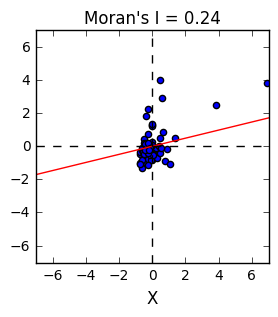

In [98]:
plt.subplots(figsize = (3,3))

x_stand = [(i-np.mean(x))/np.std(x) for i in x]
w_x = pysal.lag_spatial(w, x)
wx_stand = [(i-np.mean(w_x))/np.std(w_x) for i in w_x]

max_num = max(abs(np.array(x_stand+wx_stand)))+0.1

plt.scatter(x_stand, wx_stand)
plt.plot([-max_num, max_num], [-max_num*mi.I, max_num*mi.I], color='red', linestyle='-', linewidth=1)
plt.plot([0, 0], [-max_num, max_num], 'k--')
plt.plot([-max_num, max_num], [0, 0], 'k--')
plt.ylabel('', fontsize=12)
plt.xlabel('X', fontsize=12)
plt.xlim(-max_num, max_num)
plt.ylim(-max_num, max_num)
plt.title("Moran's I = %0.2f" % mi.I)
plt.show()

# C. Local Moran's I

In [99]:
np.random.seed(12345)
lm = pysal.Moran_Local(x,w)
lm.n

78

In [55]:
help(lm)

Help on Moran_Local in module pysal.esda.moran object:

class Moran_Local(__builtin__.object)
 |  Local Moran Statistics
 |  
 |  
 |  Parameters
 |  ----------
 |  y              : array
 |                   (n,1), attribute array
 |  w              : W
 |                   weight instance assumed to be aligned with y
 |  transformation : {'R', 'B', 'D', 'U', 'V'}
 |                   weights transformation,  default is row-standardized "r".
 |                   Other options include
 |                   "B": binary,
 |                   "D": doubly-standardized,
 |                   "U": untransformed (general weights),
 |                   "V": variance-stabilizing.
 |  permutations   : int
 |                   number of random permutations for calculation of pseudo
 |                   p_values
 |  geoda_quads    : boolean
 |                   (default=False)
 |                   If True use GeoDa scheme: HH=1, LL=2, LH=3, HL=4
 |                   If False use PySAL Scheme: HH=1, 

In [100]:
lm.p_sim

array([ 0.176,  0.073,  0.405,  0.267,  0.332,  0.057,  0.296,  0.242,
        0.055,  0.062,  0.273,  0.488,  0.44 ,  0.354,  0.415,  0.478,
        0.473,  0.374,  0.415,  0.21 ,  0.161,  0.025,  0.338,  0.375,
        0.285,  0.374,  0.208,  0.3  ,  0.373,  0.411,  0.478,  0.414,
        0.009,  0.429,  0.269,  0.015,  0.005,  0.002,  0.077,  0.001,
        0.088,  0.459,  0.435,  0.365,  0.231,  0.017,  0.033,  0.04 ,
        0.068,  0.101,  0.284,  0.309,  0.113,  0.457,  0.045,  0.269,
        0.118,  0.346,  0.328,  0.379,  0.342,  0.39 ,  0.376,  0.467,
        0.357,  0.241,  0.26 ,  0.401,  0.185,  0.172,  0.248,  0.4  ,
        0.482,  0.159,  0.373,  0.455,  0.083,  0.128])

In [101]:
lm.Is[:10]

array([-0.07728772,  0.17282319,  0.10175766,  0.08910419,  0.16279687,
       -0.29260054, -0.0506616 ,  0.14549975, -0.00092416,  0.0425654 ])

In [102]:
lm.q[:10] # values indicate quandrant location 1 HH,  2 LH,  3 LL,  4 HL

array([2, 3, 3, 3, 3, 4, 4, 3, 4, 3])

In [200]:
sig = lm.p_sim < 0.05
print lm.p_sim[sig]
print np.array(ids)[sig]
print lm.q[sig]

[ 0.025  0.009  0.015  0.005  0.002  0.001  0.017  0.033  0.04   0.045]
['22' '33' '36' '37' '38' '40' '46' '47' '48' '55']
[4 1 3 1 3 1 1 3 3 3]


# D. Geovisualization

We need to fetch regional wkt through csv file; **stl_hom.txt** doesn't have wkt.

In [324]:
f = ps.open(pysal.examples.get_path("stl_hom.csv"))
f.header

['WKT',
 'NAME',
 'STATE_NAME',
 'STATE_FIPS',
 'CNTY_FIPS',
 'FIPS',
 'FIPSNO',
 'HR7984',
 'HR8488',
 'HR8893',
 'HC7984',
 'HC8488',
 'HC8893',
 'PO7984',
 'PO8488',
 'PO8893',
 'PE77',
 'PE82',
 'PE87',
 'RDAC80',
 'RDAC85',
 'RDAC90']

##   D.1 Visualize Local Moran's I on kml

In [335]:
import simplekml
from shapely.geometry import Point, LineString, Polygon,shape
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, GeometryCollection
#import shapely.wkt
from shapely import wkt

def write_kml(path, plat=None, HH_plat=None, LH_plat=None, LL_plat=None, HL_plat=None):
    kml = simplekml.Kml()
    platbox = kml.newmultigeometry(name='Plat Box')
    HHbox = kml.newmultigeometry(name='HH Box')
    LHbox = kml.newmultigeometry(name='LH Box')
    LLbox = kml.newmultigeometry(name='LL Box')
    HLbox = kml.newmultigeometry(name='HL Box')
    
    ## each entry of plats needs to be 'str' and MultiPolygon(...) 
    
    ## write kml for plat shapebox ----
    if plat:
        for plat_wkt in plat:
            multipoly = wkt.loads(plat_wkt)
            for p in multipoly:
                gps = p.exterior.coords
                gps_kml_format = [(coord[0], coord[1]) for coord in gps]
                name = 'Plat Box'
                box = platbox.newpolygon(name=name)
                box.outerboundaryis = gps_kml_format
                #box.style.linestyle.color = 'ff0000ff'
                box.style.linestyle.color = simplekml.Color.yellow
                box.style.linestyle.width = 1.5
                box.style.polystyle.color = simplekml.Color.changealphaint(80, simplekml.Color.white)

    if HH_plat:
        for plat_wkt in HH_plat:
            multipoly = wkt.loads(plat_wkt)
            for p in multipoly:
                gps = p.exterior.coords
                gps_kml_format = [(coord[0], coord[1]) for coord in gps]
                name = 'HH Box'
                box = HHbox.newpolygon(name=name)
                box.outerboundaryis = gps_kml_format
                box.style.linestyle.color = simplekml.Color.yellow
                box.style.linestyle.width = 0.5
                box.style.polystyle.color = simplekml.Color.changealphaint(125, simplekml.Color.blue)
                
    if LH_plat:
        for plat_wkt in LH_plat:
            multipoly = wkt.loads(plat_wkt)
            for p in multipoly:
                gps = p.exterior.coords
                gps_kml_format = [(coord[0], coord[1]) for coord in gps]
                name = 'LH Box'
                box = LHbox.newpolygon(name=name)
                box.outerboundaryis = gps_kml_format
                box.style.linestyle.color = simplekml.Color.yellow
                box.style.linestyle.width = 0.5
                box.style.polystyle.color = simplekml.Color.changealphaint(125, simplekml.Color.orange)
                
    if LL_plat:
        for plat_wkt in LL_plat:
            multipoly = wkt.loads(plat_wkt)
            for p in multipoly:
                gps = p.exterior.coords
                gps_kml_format = [(coord[0], coord[1]) for coord in gps]
                name = 'LL Box'
                box = LLbox.newpolygon(name=name)
                box.outerboundaryis = gps_kml_format
                box.style.linestyle.color = simplekml.Color.yellow
                box.style.linestyle.width = 0.5
                box.style.polystyle.color = simplekml.Color.changealphaint(125, simplekml.Color.red)

    if HL_plat:
        for plat_wkt in HL_plat:
            multipoly = wkt.loads(plat_wkt)
            for p in multipoly:
                gps = p.exterior.coords
                gps_kml_format = [(coord[0], coord[1]) for coord in gps]
                name = 'HL Box'
                box = HLbox.newpolygon(name=name)
                box.outerboundaryis = gps_kml_format
                box.style.linestyle.color = simplekml.Color.yellow
                box.style.linestyle.width = 0.5
                box.style.polystyle.color = simplekml.Color.changealphaint(200, simplekml.Color.green)
                
    kml.save(path)

Convert each `Polygon` string to `MultiPolygon` string, and then write into a kml

In [314]:
plat_wkts = [MultiPolygon([wkt.loads(f[i][0][0])]).wkt for i in range(len(f))]

print len(plat_wkts)

write_kml('/Users/hhung/Desktop/mi.kml', 
          plat=plat_wkts, 
          HH_plat=[plat_wkts[i] for i in range(len(plat_wkts)) if lm.p_sim[i] < 0.05 if lm.q[i]==1],
          LH_plat=[plat_wkts[i] for i in range(len(plat_wkts)) if lm.p_sim[i] < 0.05 if lm.q[i]==2],
          LL_plat=[plat_wkts[i] for i in range(len(plat_wkts)) if lm.p_sim[i] < 0.05 if lm.q[i]==3],
          HL_plat=[plat_wkts[i] for i in range(len(plat_wkts)) if lm.p_sim[i] < 0.05 if lm.q[i]==4])

78


In [325]:
print type(f[0][0][0]), type(MultiPolygon([wkt.loads(f[0][0][0])]).wkt)
f[0][0][0], MultiPolygon([wkt.loads(f[0][0][0])]).wkt

<type 'str'> <type 'str'>


('POLYGON ((-89.585220336914062 39.978794097900391,-89.581146240234375 40.094867706298828,-89.603988647460938 40.095306396484375,-89.60589599609375 40.136119842529297,-89.6103515625 40.3251953125,-89.269027709960938 40.329566955566406,-89.268562316894531 40.285579681396484,-89.154655456542969 40.285774230957031,-89.152763366699219 40.054969787597656,-89.151618957519531 39.919403076171875,-89.224777221679688 39.918678283691406,-89.411857604980469 39.918041229248047,-89.412437438964844 39.931644439697266,-89.495201110839844 39.933486938476562,-89.4927978515625 39.980186462402344,-89.585220336914062 39.978794097900391))',
 'MULTIPOLYGON (((-89.58522033691406 39.97879409790039, -89.58114624023438 40.09486770629883, -89.60398864746094 40.09530639648438, -89.60589599609375 40.1361198425293, -89.6103515625 40.3251953125, -89.26902770996094 40.32956695556641, -89.26856231689453 40.28557968139648, -89.15465545654297 40.28577423095703, -89.15276336669922 40.05496978759766, -89.15161895751953 39.

### Generate GeoDataFrame from Pandas.DataFrame

GeoPandas intrinsically has geovisualization and spatial join functions. Thus it is convenient to work on geospatial data anaysis using GeoPandas.

In [326]:
plat_wkts = [MultiPolygon([wkt.loads(f[i][0][0])]) for i in range(len(f))]
plat_names = [f[i][0][1] for i in range(len(f))]
plat_homicides = [f[i][0][12] for i in range(len(f))]
plat_morans_i = list(lm.Is)
plat_p_value = list(lm.p_sim)
plat_types = []
for i, p_value in enumerate(lm.p_sim):
    if p_value < 0.05:
        plat_types.append(lm.q[i])
    else:
        plat_types.append(0)
# 1-no significant, 1-HH, 2-LH, 3-LL, 4-HL

In [327]:
len(plat_wkts), len(plat_names), len(plat_rates), len(plat_morans_i), len(plat_types)

(78, 78, 78, 78, 78)

In [257]:
type(plat_wkts[1]), plat_wkts[1]

(shapely.geometry.multipolygon.MultiPolygon,
 <shapely.geometry.multipolygon.MultiPolygon at 0x11c531550>)

In [329]:
data = gpd.GeoDataFrame(pd.DataFrame({'geometry': plat_wkts, 'name': plat_names, 
                                      'homicide': plat_homicides, 'morans_i': plat_morans_i, 
                                      'p_value': plat_p_value, 'type': plat_types}), 
                        crs={'init': 'epsg:4326'})
data.geometry = data.geometry

In [330]:
print type(data)
data.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry,homicide,morans_i,name,p_value,type
0,(POLYGON ((-89.58522033691406 39.9787940979003...,3,-0.077288,Logan,0.176,0
1,(POLYGON ((-90.92153930664062 39.8474617004394...,9,0.172823,Adams,0.073,0
2,(POLYGON ((-89.99759674072266 39.9062042236328...,1,0.101758,Menard,0.405,0
3,(POLYGON ((-90.58535766601562 39.8807411193847...,2,0.089104,Cass,0.267,0
4,(POLYGON ((-90.57704162597656 39.8454475402832...,0,0.162797,Brown,0.332,0


## D.2 Visualize homicide rates

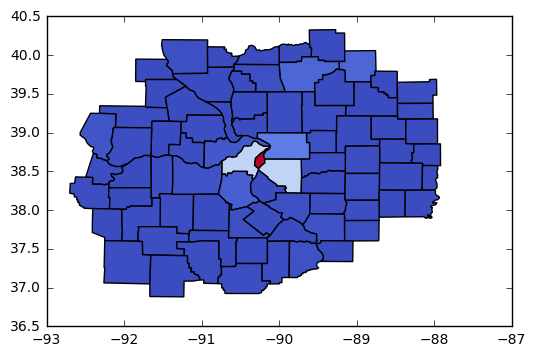

In [331]:
data.plot(column='homicide', colormap='coolwarm');

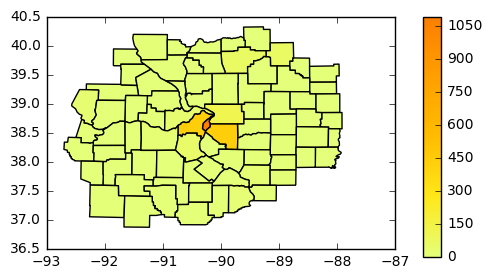

In [332]:
vmax = max(data['homicide'])

ax = data.plot(column='homicide', colormap='Wistia', figsize=(6,3), vmin=0, vmax=vmax)

fig = ax.get_figure()
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=0, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)
plt.show();

## D.3 Visualize local Moran's I and significant areas

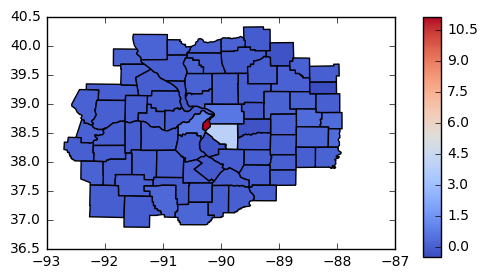

In [336]:
vmax, vmin = max(data['morans_i']), min(data['morans_i'])

ax = data.plot(column='morans_i', colormap='coolwarm', figsize=(6,3), vmin=vmin, vmax=vmax)

fig = ax.get_figure()
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)
plt.show();

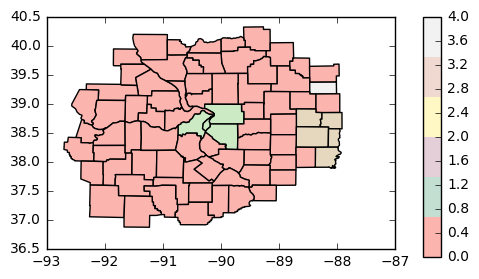

In [334]:
vmax, vmin = max(data['type']), min(data['type'])

ax = data.plot(column='type', colormap='Pastel1', figsize=(6,3), vmin=vmin, vmax=vmax)

fig = ax.get_figure()
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('Pastel1', 6), norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)
fig.show();

# E. Adjusted Moran's I

When the variable of interest (y) is based on populations with different sizes, the Moran’s I value for y needs to be adjusted to account for the differences among populations.

For example,  let’s assume that we want to estimate Moran’s I for the **rates** of newborn infants who died of Sudden Infant Death Syndrome (SIDS). We start this estimation by reading in the total number of newborn infants (BIR79) and the total number of newborn infants who died of SIDS (SID79):

In [323]:
data = pysal.open(pysal.examples.get_path("sids2.dbf"))
print data.header
b = np.array(data.by_col('BIR79')) # total number of newborn infants (BIR79)
e = np.array(data.by_col('SID79')) # total number of newborn infants who died of SIDS (SID79)
w = pysal.open(pysal.examples.get_path("sids2.gal")).read()

[u'AREA', u'PERIMETER', u'CNTY_', u'CNTY_ID', u'NAME', u'FIPS', u'FIPSNO', u'CRESS_ID', u'BIR74', u'SID74', u'NWBIR74', u'BIR79', u'SID79', u'NWBIR79', u'SIDR74', u'SIDR79', u'NWR74', u'NWR79']


In [67]:
b[:5], e[:5]

(array([ 1364.,   542.,  3616.,   830.,  1606.]),
 array([ 0.,  3.,  6.,  2.,  3.]))

The naive Moran's I is

In [73]:
mi = pysal.Moran(e, w, two_tailed=True)
print "Moran's I:", mi.I, ', E[I]:', mi.EI, ', Z-score:', mi.z_norm, ', p-value:', mi.p_norm 

Moran's I: 0.16734595008 , E[I]: -0.010101010101 , Z-score: 2.65302453469 , p-value: 0.00797740720966


**After the adjustment**, the Moran's I rate (total number of newborn infants who died of SIDS/total number of newborn infants) is 

In [75]:
mi2 = pysal.esda.moran.Moran_Rate(e, b, w, two_tailed=True)
print "Moran's I:", mi2.I, ', E[I]:', mi2.EI, ', Z-score:', mi2.z_norm, ', p-value:', mi2.p_norm 

Moran's I: 0.166223435526 , E[I]: -0.010101010101 , Z-score: 2.6362417245 , p-value: 0.00838299900978


**The local adjusted Morans' I rates ** are

In [76]:
lm = pysal.esda.moran.Moran_Local_Rate(e, b, w)
lm.Is[:10]

array([-0.13452366, -1.21133985,  0.05019761,  0.06127125, -0.12627466,
        0.23497679,  0.26345855, -0.00951288, -0.01517879, -0.34513514])